In [1]:
# imports
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\Natielle\anaconda3\envs\tensorflow2_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Natielle\anaconda3\envs\tensorflow2_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Natielle\anaconda3\envs\tensorflow2_py37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Natielle\anaconda3\env

# Regressão logística com sklearn na prática

Aqui vamos aplicar regressão logística em um banco de dados chamado 'census.csv'.

O objetivo é conseguirmos predizer se a pessoa terá uma renda maior ou menor que 50 mil por ano.

Ou seja, vamos utilizar a regressão logística para prever rótulos. 
Exemplos: se a pessoa vai jogar ou não tênis, se a pessoa vai pagar ou não


In [2]:
# Lendo o banco de dados
base = pd.read_csv("census.csv")

# Para confirmarmos se está tudo certo com o banco olhamos o começinho dele.
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Observando a quantidade de classes da coluna que queremos prever
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

Nota-se que tem apenas duas opções, então podemos aplicar a regressão logística.


In [4]:
# Analisando o tamanho da base
base.shape

(32561, 15)

Vamos converter os labels para valores numéricos.


In [5]:
def converte_classe(rotulo):
    if rotulo == ' >50K':
        return 1
    else:
        return 0

In [6]:
# Agora vamos aplicar a função de conversão que definimos na coluna income
base['income'] = base['income'].apply(converte_classe) 
# OBS: A função apply entende que será passado base['income'] para a função converte_classe no parametro rotulo

In [7]:
# Verificando o resultado
base['income'].unique()

array([0, 1], dtype=int64)

Agora iremos separar os atributos das classes...

In [8]:
X = base.drop('income', axis=1) # X será todos as colunas, exceto a income (que é o que queremos prever)
X.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [9]:
Y = base.income
print(Y)
type(Y)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64


pandas.core.series.Series

Uma análise que pode ser interessante é categorizar o atributo idade em faixas de idade, então é isso que vamos fazer.


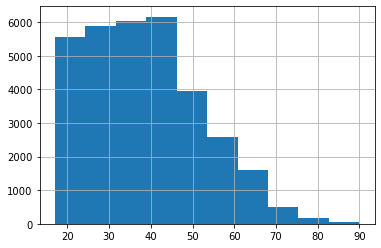

In [10]:
# Analisando a distribuição do atributo idade com o histograma da idade
base.age.hist()

In [11]:
idade = tf.feature_column.numeric_column('age')

In [12]:
# Categorizando a idade
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries=[20,30,40,50,60,70,80,90])]
print(idade_categorica)

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


Como já categorizamos, iremos separar as colunas que não são numéricas...


In [13]:
X.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [14]:
# Precisamos dos nomes para que a gente consiga definir o que as colunas irão receber pelo tensorflow 
nome_colunas_categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                           'native-country']

In [15]:
# Verificando se as variáveis de fato são categóricas (não numéricas)
print(X['sex'].unique())
print("\n\n", X['workclass'].unique())
print("\n\n", X['native-country'].unique())

[' Male' ' Female']


 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


 [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [16]:
# Definindo cada coluna do dataset
# Utilizamos o vocabularylist para "limitarmos" o que a coluna recebe, ou seja, quais são as opções de respostas que a coluna tem
colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key = c, vocabulary_list=X[c].unique()) for c in nome_colunas_categoricas]

In [17]:
# Verificando se deu certo
print(colunas_categoricas[0])

VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [18]:
# Agora vamos fazer a mesma coisa, porém será para as colunas numéricas
nome_colunas_numericas = ['final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']
colunas_numericas = [ tf.feature_column.numeric_column(key = c) for c in nome_colunas_numericas ]
print(colunas_numericas[1])

NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [19]:
# Definição de todas as colunas
colunas = idade_categorica + colunas_categoricas + colunas_numericas
colunas

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90)),
 VocabularyListCategoricalColumn(key='workclass', vocabulary_list=(' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='education', vocabulary_list=(' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th', ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='marital-status', vocabulary_list=(' Never-married', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Separated', ' Married-AF-spouse', ' Widowed'), dtype=tf.string, default_value=-1, num_oov_buck

In [20]:
# Aqui estamos separando 30% do dataset para testarmos e 70% para treinarmos o modelo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

# Analisando as dimensões
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

X_train:  (22792, 14)
X_test:  (9769, 14)
Y_train:  (22792,)
Y_test:  (9769,)


In [21]:
# Vamos utilizar o estimator agora para implementarmos o modelo em si
funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x = X_train, y = Y_train,
                                                      batch_size=32,# pega em lotes de 32
                                                      num_epochs=None, # quantidade de vezes que vai rodar
                                                      shuffle=True) # pega ordem aleatória

In [22]:
# Criando nosso modelo
classificador = tf.estimator.LinearClassifier(feature_columns=colunas)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Natielle\\AppData\\Local\\Temp\\tmp5t9nl80v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C9FE51F4E0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [23]:
# Agora vamos fazer o treinamento
classificador.train(input_fn=funcao_treinamento, steps = 10000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Natielle\AppData\Local\Temp\tmp5t9nl80v\model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 144.796
INFO:tensorflow:loss = 28211.676, step = 101 (0.698 sec)
INFO:tensorflow:global_step/sec: 383.17
INFO:tensorflow:loss = 32639.646, step = 201 (0.259 sec)
IN

INFO:tensorflow:global_step/sec: 342.21
INFO:tensorflow:loss = 2510.8179, step = 6001 (0.292 sec)
INFO:tensorflow:global_step/sec: 332.07
INFO:tensorflow:loss = 4793.541, step = 6101 (0.301 sec)
INFO:tensorflow:global_step/sec: 310.42
INFO:tensorflow:loss = 763.5207, step = 6201 (0.321 sec)
INFO:tensorflow:global_step/sec: 339.859
INFO:tensorflow:loss = 762.05145, step = 6301 (0.295 sec)
INFO:tensorflow:global_step/sec: 351.85
INFO:tensorflow:loss = 1966.0361, step = 6401 (0.286 sec)
INFO:tensorflow:global_step/sec: 394.266
INFO:tensorflow:loss = 2703.7817, step = 6501 (0.248 sec)
INFO:tensorflow:global_step/sec: 367.519
INFO:tensorflow:loss = 1900.9137, step = 6601 (0.275 sec)
INFO:tensorflow:global_step/sec: 423.069
INFO:tensorflow:loss = 59.49281, step = 6701 (0.238 sec)
INFO:tensorflow:global_step/sec: 428.719
INFO:tensorflow:loss = 368.84595, step = 6801 (0.228 sec)
INFO:tensorflow:global_step/sec: 390.557
INFO:tensorflow:loss = 1925.6815, step = 6901 (0.267 sec)
INFO:tensorflow:g

In [28]:
# Agora vamos fazer a função da previsao
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x = X_test,
                                                  shuffle=False) # pega em ordem 

previsoes = classificador.predict(input_fn=funcao_previsao)

In [29]:
# visualizando a previsão
list(previsoes)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Natielle\AppData\Local\Temp\tmp5t9nl80v\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([149.1964], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([0., 1.], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([33.267773], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([3.5644286e-15, 1.0000000e+00], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([111.20025], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([0., 1.], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-57.71975], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1.000000e+00, 8.563106e-26], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-146.14835], dtype=float32),
  'logistic': array

Notar que o atributo 'logistic' mostra o resultado da previsão e o atributo 'probabilities' mostra a probabilidade de ser de fato a previsão.


In [42]:
# Agora vamos visualizar as previsões de modo mais claro
previsoes_final = []
for p in classificador.predict(input_fn=funcao_previsao):
    previsoes_final.append(p['class_ids'].astype(int))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Natielle\AppData\Local\Temp\tmp5t9nl80v\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [43]:
previsoes_final

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),

In [45]:
# Então vamos analisar a taxa de acerto
taxa_acerto = accuracy_score(Y_test, previsoes_final)
taxa_acerto

0.7931210973487562

Neste caso, a aplicação da regressão logística com o sklearn obteve uma taxa de acerto maior.
Nota-se também que categorizamos a idade de uma maneira diferente.